# Association_Rules

# Q2

Prepare rules for the all the data sets (Movies)

1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values.

2) Change the minimum length in apriori algorithm.

3) Visulize the obtained rules using different plots.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules

In [3]:
movie=pd.read_csv("my_movies.csv")
movie

V1             V2             V3          V4     V5  \
0    Sixth Sense          LOTR1  Harry Potter1  Green Mile  LOTR2   
1      Gladiator        Patriot     Braveheart         NaN    NaN   
2          LOTR1          LOTR2            NaN         NaN    NaN   
3      Gladiator        Patriot    Sixth Sense         NaN    NaN   
4      Gladiator        Patriot    Sixth Sense         NaN    NaN   
5      Gladiator        Patriot    Sixth Sense         NaN    NaN   
6  Harry Potter1  Harry Potter2            NaN         NaN    NaN   
7      Gladiator        Patriot            NaN         NaN    NaN   
8      Gladiator        Patriot    Sixth Sense         NaN    NaN   
9    Sixth Sense           LOTR      Gladiator  Green Mile    NaN   

   Sixth Sense  Gladiator  LOTR1  Harry Potter1  Patriot  LOTR2  \
0            1          0      1              1        0      1   
1            0          1      0              0        1      0   
2            0          0      1              0        0      1   
3            1          1      0              0        1      0   
4            1          1      0              0        1      0   
5            1          1      0              0        1      0   
6            0          0      0              1        0      0   
7            0          1      0              0        1      0   
8            1          1      0              0        1      0   
9            1          1      0              0        0      0   

   Harry Potter2  LOTR  Braveheart  Green Mile  
0              0     0           0           1  
1              0     0           1           0  
2              0     0           0           0  
3              0     0           0           0  
4              0     0           0           0  
5              0     0           0           0  
6              1     0           0           0  
7              0     0           0           0  
8              0     0           0           0  
9              0     1           0           1

# EDA

In [4]:
movie.shape

(10, 15)

In [6]:
movie.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'Sixth Sense', 'Gladiator', 'LOTR1',
       'Harry Potter1', 'Patriot', 'LOTR2', 'Harry Potter2', 'LOTR',
       'Braveheart', 'Green Mile'],
      dtype='object')

In [8]:
movie.dtypes

V1               object
V2               object
V3               object
V4               object
V5               object
Sixth Sense       int64
Gladiator         int64
LOTR1             int64
Harry Potter1     int64
Patriot           int64
LOTR2             int64
Harry Potter2     int64
LOTR              int64
Braveheart        int64
Green Mile        int64
dtype: object

In [9]:
movie.corr()

Sixth Sense  Gladiator     LOTR1  Harry Potter1   Patriot  \
Sixth Sense       1.000000   0.356348 -0.102062      -0.102062  0.166667   
Gladiator         0.356348   1.000000 -0.763763      -0.763763  0.801784   
LOTR1            -0.102062  -0.763763  1.000000       0.375000 -0.612372   
Harry Potter1    -0.102062  -0.763763  0.375000       1.000000 -0.612372   
Patriot           0.166667   0.801784 -0.612372      -0.612372  1.000000   
LOTR2            -0.102062  -0.763763  1.000000       0.375000 -0.612372   
Harry Potter2    -0.408248  -0.509175 -0.166667       0.666667 -0.408248   
LOTR              0.272166   0.218218 -0.166667      -0.166667 -0.408248   
Braveheart       -0.408248   0.218218 -0.166667      -0.166667  0.272166   
Green Mile        0.408248  -0.218218  0.375000       0.375000 -0.612372   

                  LOTR2  Harry Potter2      LOTR  Braveheart  Green Mile  
Sixth Sense   -0.102062      -0.408248  0.272166   -0.408248    0.408248  
Gladiator     -0.763763      -0.509175  0.218218    0.218218   -0.218218  
LOTR1          1.000000      -0.166667 -0.166667   -0.166667    0.375000  
Harry Potter1  0.375000       0.666667 -0.166667   -0.166667    0.375000  
Patriot       -0.612372      -0.408248 -0.408248    0.272166   -0.612372  
LOTR2          1.000000      -0.166667 -0.166667   -0.166667    0.375000  
Harry Potter2 -0.166667       1.000000 -0.111111   -0.111111   -0.166667  
LOTR          -0.166667      -0.111111  1.000000   -0.111111    0.666667  
Braveheart    -0.166667      -0.111111 -0.111111    1.000000   -0.166667  
Green Mile     0.375000      -0.166667  0.666667   -0.166667    1.000000

In [10]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   V1             10 non-null     object
 1   V2             10 non-null     object
 2   V3             7 non-null      object
 3   V4             2 non-null      object
 4   V5             1 non-null      object
 5   Sixth Sense    10 non-null     int64 
 6   Gladiator      10 non-null     int64 
 7   LOTR1          10 non-null     int64 
 8   Harry Potter1  10 non-null     int64 
 9   Patriot        10 non-null     int64 
 10  LOTR2          10 non-null     int64 
 11  Harry Potter2  10 non-null     int64 
 12  LOTR           10 non-null     int64 
 13  Braveheart     10 non-null     int64 
 14  Green Mile     10 non-null     int64 
dtypes: int64(10), object(5)
memory usage: 1.3+ KB


In [11]:
movie.isnull().sum()

V1               0
V2               0
V3               3
V4               8
V5               9
Sixth Sense      0
Gladiator        0
LOTR1            0
Harry Potter1    0
Patriot          0
LOTR2            0
Harry Potter2    0
LOTR             0
Braveheart       0
Green Mile       0
dtype: int64

# Data Pre-Processing

In [14]:
movies=movie.iloc[:,5:] #to takes binary data 
movies

Sixth Sense  Gladiator  LOTR1  Harry Potter1  Patriot  LOTR2  \
0            1          0      1              1        0      1   
1            0          1      0              0        1      0   
2            0          0      1              0        0      1   
3            1          1      0              0        1      0   
4            1          1      0              0        1      0   
5            1          1      0              0        1      0   
6            0          0      0              1        0      0   
7            0          1      0              0        1      0   
8            1          1      0              0        1      0   
9            1          1      0              0        0      0   

   Harry Potter2  LOTR  Braveheart  Green Mile  
0              0     0           0           1  
1              0     0           1           0  
2              0     0           0           0  
3              0     0           0           0  
4              0     0           0           0  
5              0     0           0           0  
6              1     0           0           0  
7              0     0           0           0  
8              0     0           0           0  
9              0     1           0           1

In [15]:
#data=pd.get_dummies(movie)    #It converts categorical data into dummy or indicator variables
#data                  

# Apriori Algorithm

i) Association rules with 10% Support and 70% confidence

In [19]:
import warnings
warnings.filterwarnings("ignore")

In [20]:
# With 10% Support
frequent_itemsets = apriori(movies, min_support=0.1, use_colnames=True)
frequent_itemsets

support                                           itemsets
0       0.6                                      (Sixth Sense)
1       0.7                                        (Gladiator)
2       0.2                                            (LOTR1)
3       0.2                                    (Harry Potter1)
4       0.6                                          (Patriot)
5       0.2                                            (LOTR2)
6       0.1                                    (Harry Potter2)
7       0.1                                             (LOTR)
8       0.1                                       (Braveheart)
9       0.2                                       (Green Mile)
10      0.5                           (Gladiator, Sixth Sense)
11      0.1                               (Sixth Sense, LOTR1)
12      0.1                       (Harry Potter1, Sixth Sense)
13      0.4                             (Patriot, Sixth Sense)
14      0.1                               (LOTR2, Sixth Sense)
15      0.1                                (LOTR, Sixth Sense)
16      0.2                          (Green Mile, Sixth Sense)
17      0.6                               (Gladiator, Patriot)
18      0.1                                  (Gladiator, LOTR)
19      0.1                            (Gladiator, Braveheart)
20      0.1                            (Gladiator, Green Mile)
21      0.1                             (Harry Potter1, LOTR1)
22      0.2                                     (LOTR2, LOTR1)
23      0.1                                (Green Mile, LOTR1)
24      0.1                             (LOTR2, Harry Potter1)
25      0.1                     (Harry Potter2, Harry Potter1)
26      0.1                        (Green Mile, Harry Potter1)
27      0.1                              (Patriot, Braveheart)
28      0.1                                (LOTR2, Green Mile)
29      0.1                                 (Green Mile, LOTR)
30      0.4                  (Gladiator, Patriot, Sixth Sense)
31      0.1                     (Gladiator, LOTR, Sixth Sense)
32      0.1               (Gladiator, Green Mile, Sixth Sense)
33      0.1                (Harry Potter1, Sixth Sense, LOTR1)
34      0.1                        (LOTR2, Sixth Sense, LOTR1)
35      0.1                   (Green Mile, Sixth Sense, LOTR1)
36      0.1                (LOTR2, Harry Potter1, Sixth Sense)
37      0.1           (Green Mile, Harry Potter1, Sixth Sense)
38      0.1                   (LOTR2, Green Mile, Sixth Sense)
39      0.1                    (Green Mile, LOTR, Sixth Sense)
40      0.1                   (Gladiator, Patriot, Braveheart)
41      0.1                      (Gladiator, Green Mile, LOTR)
42      0.1                      (LOTR2, Harry Potter1, LOTR1)
43      0.1                 (Green Mile, Harry Potter1, LOTR1)
44      0.1                         (LOTR2, Green Mile, LOTR1)
45      0.1                 (LOTR2, Green Mile, Harry Potter1)
46      0.1         (Gladiator, Green Mile, LOTR, Sixth Sense)
47      0.1         (LOTR2, Harry Potter1, Sixth Sense, LOTR1)
48      0.1    (Green Mile, Harry Potter1, Sixth Sense, LOTR1)
49      0.1            (LOTR2, Green Mile, Sixth Sense, LOTR1)
50      0.1    (LOTR2, Green Mile, Harry Potter1, Sixth Sense)
51      0.1          (LOTR2, Green Mile, Harry Potter1, LOTR1)
52      0.1  (Harry Potter1, Sixth Sense, LOTR2, LOTR1, Gre...

In [21]:
# with 70% confidence
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.7)
rules

antecedents                                      consequents  \
0        (Gladiator)                                    (Sixth Sense)   
1      (Sixth Sense)                                      (Gladiator)   
2      (Sixth Sense)                                          (LOTR1)   
3            (LOTR1)                                    (Sixth Sense)   
4    (Harry Potter1)                                    (Sixth Sense)   
..               ...                                              ...   
245  (Harry Potter1)          (LOTR2, Green Mile, Sixth Sense, LOTR1)   
246    (Sixth Sense)        (LOTR2, Green Mile, Harry Potter1, LOTR1)   
247          (LOTR2)  (Green Mile, Harry Potter1, Sixth Sense, LOTR1)   
248          (LOTR1)  (LOTR2, Green Mile, Harry Potter1, Sixth Sense)   
249     (Green Mile)       (LOTR2, Harry Potter1, Sixth Sense, LOTR1)   

     antecedent support  consequent support  support  confidence      lift  \
0                   0.7                 0.6      0.5    0.714286  1.190476   
1                   0.6                 0.7      0.5    0.833333  1.190476   
2                   0.6                 0.2      0.1    0.166667  0.833333   
3                   0.2                 0.6      0.1    0.500000  0.833333   
4                   0.2                 0.6      0.1    0.500000  0.833333   
..                  ...                 ...      ...         ...       ...   
245                 0.2                 0.1      0.1    0.500000  5.000000   
246                 0.6                 0.1      0.1    0.166667  1.666667   
247                 0.2                 0.1      0.1    0.500000  5.000000   
248                 0.2                 0.1      0.1    0.500000  5.000000   
249                 0.2                 0.1      0.1    0.500000  5.000000   

     leverage  conviction  
0        0.08        1.40  
1        0.08        1.80  
2       -0.02        0.96  
3       -0.02        0.80  
4       -0.02        0.80  
..        ...         ...  
245      0.08        1.80  
246      0.04        1.08  
247      0.08        1.80  
248      0.08        1.80  
249      0.08        1.80  

[250 rows x 9 columns]

In [22]:
#An leverage value of 0 indicates independence. Range will be [-1 1]
# high conviction value means that the consequent is highly depending on the antecedent and range [0 inf]

# Sorting Value By Decending Order

In [23]:
rules.sort_values('lift',ascending = False)[0:20]

antecedents                   consequents  \
186                   (Green Mile, LOTR1)          (LOTR2, Sixth Sense)   
198                  (LOTR2, Sixth Sense)   (Green Mile, Harry Potter1)   
225   (LOTR2, Harry Potter1, Sixth Sense)           (Green Mile, LOTR1)   
137  (Gladiator, Green Mile, Sixth Sense)                        (LOTR)   
215                (Harry Potter1, LOTR1)           (LOTR2, Green Mile)   
158                (Harry Potter1, LOTR1)          (LOTR2, Sixth Sense)   
214                   (Green Mile, LOTR1)        (LOTR2, Harry Potter1)   
211                (LOTR2, Harry Potter1)           (Green Mile, LOTR1)   
159                  (Sixth Sense, LOTR1)        (LOTR2, Harry Potter1)   
201          (Harry Potter1, Sixth Sense)           (LOTR2, Green Mile)   
199           (Green Mile, Harry Potter1)          (LOTR2, Sixth Sense)   
196                   (LOTR2, Green Mile)  (Harry Potter1, Sixth Sense)   
226   (Harry Potter1, Sixth Sense, LOTR1)           (LOTR2, Green Mile)   
111                                (LOTR)       (Gladiator, Green Mile)   
106               (Gladiator, Green Mile)                        (LOTR)   
168           (Green Mile, Harry Potter1)          (Sixth Sense, LOTR1)   
170                   (Green Mile, LOTR1)  (Harry Potter1, Sixth Sense)   
187                  (Sixth Sense, LOTR1)           (LOTR2, Green Mile)   
171          (Harry Potter1, Sixth Sense)           (Green Mile, LOTR1)   
173                  (Sixth Sense, LOTR1)   (Green Mile, Harry Potter1)   

     antecedent support  consequent support  support  confidence  lift  \
186                 0.1                 0.1      0.1         1.0  10.0   
198                 0.1                 0.1      0.1         1.0  10.0   
225                 0.1                 0.1      0.1         1.0  10.0   
137                 0.1                 0.1      0.1         1.0  10.0   
215                 0.1                 0.1      0.1         1.0  10.0   
158                 0.1                 0.1      0.1         1.0  10.0   
214                 0.1                 0.1      0.1         1.0  10.0   
211                 0.1                 0.1      0.1         1.0  10.0   
159                 0.1                 0.1      0.1         1.0  10.0   
201                 0.1                 0.1      0.1         1.0  10.0   
199                 0.1                 0.1      0.1         1.0  10.0   
196                 0.1                 0.1      0.1         1.0  10.0   
226                 0.1                 0.1      0.1         1.0  10.0   
111                 0.1                 0.1      0.1         1.0  10.0   
106                 0.1                 0.1      0.1         1.0  10.0   
168                 0.1                 0.1      0.1         1.0  10.0   
170                 0.1                 0.1      0.1         1.0  10.0   
187                 0.1                 0.1      0.1         1.0  10.0   
171                 0.1                 0.1      0.1         1.0  10.0   
173                 0.1                 0.1      0.1         1.0  10.0   

     leverage  conviction  
186      0.09         inf  
198      0.09         inf  
225      0.09         inf  
137      0.09         inf  
215      0.09         inf  
158      0.09         inf  
214      0.09         inf  
211      0.09         inf  
159      0.09         inf  
201      0.09         inf  
199      0.09         inf  
196      0.09         inf  
226      0.09         inf  
111      0.09         inf  
106      0.09         inf  
168      0.09         inf  
170      0.09         inf  
187      0.09         inf  
171      0.09         inf  
173      0.09         inf

In [24]:
# Lift Ratio > 1 is a good influential rule in selecting the associated transactions
rules[rules.lift>1]

antecedents                                      consequents  \
0        (Gladiator)                                    (Sixth Sense)   
1      (Sixth Sense)                                      (Gladiator)   
6          (Patriot)                                    (Sixth Sense)   
7      (Sixth Sense)                                        (Patriot)   
10            (LOTR)                                    (Sixth Sense)   
..               ...                                              ...   
245  (Harry Potter1)          (LOTR2, Green Mile, Sixth Sense, LOTR1)   
246    (Sixth Sense)        (LOTR2, Green Mile, Harry Potter1, LOTR1)   
247          (LOTR2)  (Green Mile, Harry Potter1, Sixth Sense, LOTR1)   
248          (LOTR1)  (LOTR2, Green Mile, Harry Potter1, Sixth Sense)   
249     (Green Mile)       (LOTR2, Harry Potter1, Sixth Sense, LOTR1)   

     antecedent support  consequent support  support  confidence      lift  \
0                   0.7                 0.6      0.5    0.714286  1.190476   
1                   0.6                 0.7      0.5    0.833333  1.190476   
6                   0.6                 0.6      0.4    0.666667  1.111111   
7                   0.6                 0.6      0.4    0.666667  1.111111   
10                  0.1                 0.6      0.1    1.000000  1.666667   
..                  ...                 ...      ...         ...       ...   
245                 0.2                 0.1      0.1    0.500000  5.000000   
246                 0.6                 0.1      0.1    0.166667  1.666667   
247                 0.2                 0.1      0.1    0.500000  5.000000   
248                 0.2                 0.1      0.1    0.500000  5.000000   
249                 0.2                 0.1      0.1    0.500000  5.000000   

     leverage  conviction  
0        0.08        1.40  
1        0.08        1.80  
6        0.04        1.20  
7        0.04        1.20  
10       0.04         inf  
..        ...         ...  
245      0.08        1.80  
246      0.04        1.08  
247      0.08        1.80  
248      0.08        1.80  
249      0.08        1.80  

[236 rows x 9 columns]

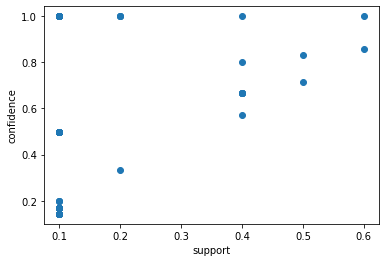

In [25]:
# visualization of obtained rule
plt.scatter(rules['support'],rules['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

# ii) Association rules with 5% Support and 90% Confidence

In [27]:
# With 5% Support
frequent_itemsets = apriori(movies, min_support=0.05, use_colnames=True)
frequent_itemsets

support                                           itemsets
0       0.6                                      (Sixth Sense)
1       0.7                                        (Gladiator)
2       0.2                                            (LOTR1)
3       0.2                                    (Harry Potter1)
4       0.6                                          (Patriot)
5       0.2                                            (LOTR2)
6       0.1                                    (Harry Potter2)
7       0.1                                             (LOTR)
8       0.1                                       (Braveheart)
9       0.2                                       (Green Mile)
10      0.5                           (Gladiator, Sixth Sense)
11      0.1                               (Sixth Sense, LOTR1)
12      0.1                       (Harry Potter1, Sixth Sense)
13      0.4                             (Patriot, Sixth Sense)
14      0.1                               (LOTR2, Sixth Sense)
15      0.1                                (LOTR, Sixth Sense)
16      0.2                          (Green Mile, Sixth Sense)
17      0.6                               (Gladiator, Patriot)
18      0.1                                  (Gladiator, LOTR)
19      0.1                            (Gladiator, Braveheart)
20      0.1                            (Gladiator, Green Mile)
21      0.1                             (Harry Potter1, LOTR1)
22      0.2                                     (LOTR2, LOTR1)
23      0.1                                (Green Mile, LOTR1)
24      0.1                             (LOTR2, Harry Potter1)
25      0.1                     (Harry Potter2, Harry Potter1)
26      0.1                        (Green Mile, Harry Potter1)
27      0.1                              (Patriot, Braveheart)
28      0.1                                (LOTR2, Green Mile)
29      0.1                                 (Green Mile, LOTR)
30      0.4                  (Gladiator, Patriot, Sixth Sense)
31      0.1                     (Gladiator, LOTR, Sixth Sense)
32      0.1               (Gladiator, Green Mile, Sixth Sense)
33      0.1                (Harry Potter1, Sixth Sense, LOTR1)
34      0.1                        (LOTR2, Sixth Sense, LOTR1)
35      0.1                   (Green Mile, Sixth Sense, LOTR1)
36      0.1                (LOTR2, Harry Potter1, Sixth Sense)
37      0.1           (Green Mile, Harry Potter1, Sixth Sense)
38      0.1                   (LOTR2, Green Mile, Sixth Sense)
39      0.1                    (Green Mile, LOTR, Sixth Sense)
40      0.1                   (Gladiator, Patriot, Braveheart)
41      0.1                      (Gladiator, Green Mile, LOTR)
42      0.1                      (LOTR2, Harry Potter1, LOTR1)
43      0.1                 (Green Mile, Harry Potter1, LOTR1)
44      0.1                         (LOTR2, Green Mile, LOTR1)
45      0.1                 (LOTR2, Green Mile, Harry Potter1)
46      0.1         (Gladiator, Green Mile, LOTR, Sixth Sense)
47      0.1         (LOTR2, Harry Potter1, Sixth Sense, LOTR1)
48      0.1    (Green Mile, Harry Potter1, Sixth Sense, LOTR1)
49      0.1            (LOTR2, Green Mile, Sixth Sense, LOTR1)
50      0.1    (LOTR2, Green Mile, Harry Potter1, Sixth Sense)
51      0.1          (LOTR2, Green Mile, Harry Potter1, LOTR1)
52      0.1  (Harry Potter1, Sixth Sense, LOTR2, LOTR1, Gre...

In [28]:
# with 90% confidence
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.9)
rules

antecedents                                      consequents  \
0        (Gladiator)                                    (Sixth Sense)   
1      (Sixth Sense)                                      (Gladiator)   
2          (Patriot)                                    (Sixth Sense)   
3      (Sixth Sense)                                        (Patriot)   
4             (LOTR)                                    (Sixth Sense)   
..               ...                                              ...   
233  (Harry Potter1)          (LOTR2, Green Mile, Sixth Sense, LOTR1)   
234    (Sixth Sense)        (LOTR2, Green Mile, Harry Potter1, LOTR1)   
235          (LOTR2)  (Green Mile, Harry Potter1, Sixth Sense, LOTR1)   
236          (LOTR1)  (LOTR2, Green Mile, Harry Potter1, Sixth Sense)   
237     (Green Mile)       (LOTR2, Harry Potter1, Sixth Sense, LOTR1)   

     antecedent support  consequent support  support  confidence      lift  \
0                   0.7                 0.6      0.5    0.714286  1.190476   
1                   0.6                 0.7      0.5    0.833333  1.190476   
2                   0.6                 0.6      0.4    0.666667  1.111111   
3                   0.6                 0.6      0.4    0.666667  1.111111   
4                   0.1                 0.6      0.1    1.000000  1.666667   
..                  ...                 ...      ...         ...       ...   
233                 0.2                 0.1      0.1    0.500000  5.000000   
234                 0.6                 0.1      0.1    0.166667  1.666667   
235                 0.2                 0.1      0.1    0.500000  5.000000   
236                 0.2                 0.1      0.1    0.500000  5.000000   
237                 0.2                 0.1      0.1    0.500000  5.000000   

     leverage  conviction  
0        0.08        1.40  
1        0.08        1.80  
2        0.04        1.20  
3        0.04        1.20  
4        0.04         inf  
..        ...         ...  
233      0.08        1.80  
234      0.04        1.08  
235      0.08        1.80  
236      0.08        1.80  
237      0.08        1.80  

[238 rows x 9 columns]

In [29]:
rules.sort_values('lift',ascending = False)[0:20]

antecedents                           consequents  \
202           (Green Mile, LOTR1)                (LOTR2, Harry Potter1)   
187   (Green Mile, Harry Potter1)                  (LOTR2, Sixth Sense)   
128       (Gladiator, Green Mile)                   (LOTR, Sixth Sense)   
94        (Gladiator, Green Mile)                                (LOTR)   
203        (Harry Potter1, LOTR1)                   (LOTR2, Green Mile)   
133           (LOTR, Sixth Sense)               (Gladiator, Green Mile)   
199        (LOTR2, Harry Potter1)                   (Green Mile, LOTR1)   
198           (LOTR2, Green Mile)                (Harry Potter1, LOTR1)   
136                        (LOTR)  (Gladiator, Green Mile, Sixth Sense)   
142        (LOTR2, Harry Potter1)                  (Sixth Sense, LOTR1)   
143          (LOTR2, Sixth Sense)                (Harry Potter1, LOTR1)   
189  (Harry Potter1, Sixth Sense)                   (LOTR2, Green Mile)   
186          (LOTR2, Sixth Sense)           (Green Mile, Harry Potter1)   
99                         (LOTR)               (Gladiator, Green Mile)   
184           (LOTR2, Green Mile)          (Harry Potter1, Sixth Sense)   
146        (Harry Potter1, LOTR1)                  (LOTR2, Sixth Sense)   
147          (Sixth Sense, LOTR1)                (LOTR2, Harry Potter1)   
175          (Sixth Sense, LOTR1)                   (LOTR2, Green Mile)   
174           (Green Mile, LOTR1)                  (LOTR2, Sixth Sense)   
171          (LOTR2, Sixth Sense)                   (Green Mile, LOTR1)   

     antecedent support  consequent support  support  confidence  lift  \
202                 0.1                 0.1      0.1         1.0  10.0   
187                 0.1                 0.1      0.1         1.0  10.0   
128                 0.1                 0.1      0.1         1.0  10.0   
94                  0.1                 0.1      0.1         1.0  10.0   
203                 0.1                 0.1      0.1         1.0  10.0   
133                 0.1                 0.1      0.1         1.0  10.0   
199                 0.1                 0.1      0.1         1.0  10.0   
198                 0.1                 0.1      0.1         1.0  10.0   
136                 0.1                 0.1      0.1         1.0  10.0   
142                 0.1                 0.1      0.1         1.0  10.0   
143                 0.1                 0.1      0.1         1.0  10.0   
189                 0.1                 0.1      0.1         1.0  10.0   
186                 0.1                 0.1      0.1         1.0  10.0   
99                  0.1                 0.1      0.1         1.0  10.0   
184                 0.1                 0.1      0.1         1.0  10.0   
146                 0.1                 0.1      0.1         1.0  10.0   
147                 0.1                 0.1      0.1         1.0  10.0   
175                 0.1                 0.1      0.1         1.0  10.0   
174                 0.1                 0.1      0.1         1.0  10.0   
171                 0.1                 0.1      0.1         1.0  10.0   

     leverage  conviction  
202      0.09         inf  
187      0.09         inf  
128      0.09         inf  
94       0.09         inf  
203      0.09         inf  
133      0.09         inf  
199      0.09         inf  
198      0.09         inf  
136      0.09         inf  
142      0.09         inf  
143      0.09         inf  
189      0.09         inf  
186      0.09         inf  
99       0.09         inf  
184      0.09         inf  
146      0.09         inf  
147      0.09         inf  
175      0.09         inf  
174      0.09         inf  
171      0.09         inf

In [30]:
# Lift Ratio > 1 is a good influential rule in selecting the associated transactions
rules[rules.lift>1]

antecedents                                      consequents  \
0        (Gladiator)                                    (Sixth Sense)   
1      (Sixth Sense)                                      (Gladiator)   
2          (Patriot)                                    (Sixth Sense)   
3      (Sixth Sense)                                        (Patriot)   
4             (LOTR)                                    (Sixth Sense)   
..               ...                                              ...   
233  (Harry Potter1)          (LOTR2, Green Mile, Sixth Sense, LOTR1)   
234    (Sixth Sense)        (LOTR2, Green Mile, Harry Potter1, LOTR1)   
235          (LOTR2)  (Green Mile, Harry Potter1, Sixth Sense, LOTR1)   
236          (LOTR1)  (LOTR2, Green Mile, Harry Potter1, Sixth Sense)   
237     (Green Mile)       (LOTR2, Harry Potter1, Sixth Sense, LOTR1)   

     antecedent support  consequent support  support  confidence      lift  \
0                   0.7                 0.6      0.5    0.714286  1.190476   
1                   0.6                 0.7      0.5    0.833333  1.190476   
2                   0.6                 0.6      0.4    0.666667  1.111111   
3                   0.6                 0.6      0.4    0.666667  1.111111   
4                   0.1                 0.6      0.1    1.000000  1.666667   
..                  ...                 ...      ...         ...       ...   
233                 0.2                 0.1      0.1    0.500000  5.000000   
234                 0.6                 0.1      0.1    0.166667  1.666667   
235                 0.2                 0.1      0.1    0.500000  5.000000   
236                 0.2                 0.1      0.1    0.500000  5.000000   
237                 0.2                 0.1      0.1    0.500000  5.000000   

     leverage  conviction  
0        0.08        1.40  
1        0.08        1.80  
2        0.04        1.20  
3        0.04        1.20  
4        0.04         inf  
..        ...         ...  
233      0.08        1.80  
234      0.04        1.08  
235      0.08        1.80  
236      0.08        1.80  
237      0.08        1.80  

[236 rows x 9 columns]

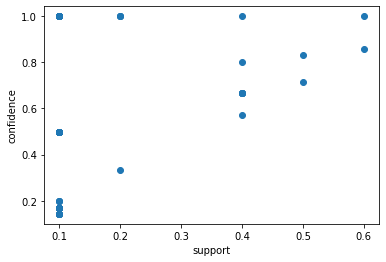

In [31]:
# visualization of obtained rule
plt.scatter(rules['support'],rules['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

# Conclusion

In [ ]:
As shown above

Lower the Confidence level Higher the no. of rules.
Higher the Support, lower the no. of rules.